# Miniproject #1: Classification and Regression

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from mp1 import (generate_dataset_classification, 
                 generate_a_disk, 
                 generate_test_set_classification,
                 generate_dataset_regression,
                 visualize_prediction,
                 generate_dataset_denoising)
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, UpSampling2D
from keras.models import Sequential

Using TensorFlow backend.


##  Simple Classification

In [2]:
X_train, Y_train = generate_dataset_classification(300, 20)

Creating data:
0
100
200


### Classification with SGD

In [40]:
model = Sequential()
model.add(Dense(units=4, activation='linear', input_dim=5184))
model.add(Dense(units=3, activation='linear', input_dim=5184))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(), 
              metrics=[keras.metrics.categorical_accuracy])

model.fit(X_train, keras.utils.to_categorical(Y_train), epochs=10, batch_size=32)

Epoch 1/10
300/300 [==============================] - 1s 2ms/step - loss: 1.0728 - categorical_accuracy: 0.4133
Epoch 2/10
300/300 [==============================] - 0s 115us/step - loss: 1.1906 - categorical_accuracy: 0.3800
Epoch 3/10
300/300 [==============================] - 0s 116us/step - loss: 1.0786 - categorical_accuracy: 0.3800
Epoch 4/10
300/300 [==============================] - 0s 136us/step - loss: 1.0428 - categorical_accuracy: 0.3833
Epoch 5/10
300/300 [==============================] - 0s 162us/step - loss: 1.0213 - categorical_accuracy: 0.5000
Epoch 6/10
300/300 [==============================] - 0s 195us/step - loss: 1.0005 - categorical_accuracy: 0.5800
Epoch 7/10
300/300 [==============================] - 0s 108us/step - loss: 0.9673 - categorical_accuracy: 0.6433
Epoch 8/10
300/300 [==============================] - 0s 89us/step - loss: 0.8727 - categorical_accuracy: 0.6667
Epoch 9/10
300/300 [==============================] - 0s 116us/step - loss: 3.0288 - catego

### Classification with ADAM

In [41]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(), 
              metrics=[keras.metrics.categorical_accuracy])

model.fit(X_train, keras.utils.to_categorical(Y_train), epochs=20, batch_size=32)

Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 1.0994 - categorical_accuracy: 0.2867
Epoch 2/20
300/300 [==============================] - 0s 172us/step - loss: 1.0733 - categorical_accuracy: 0.2200
Epoch 3/20
300/300 [==============================] - 0s 123us/step - loss: 1.0400 - categorical_accuracy: 0.1833
Epoch 4/20
300/300 [==============================] - 0s 172us/step - loss: 0.9475 - categorical_accuracy: 0.1633
Epoch 5/20
300/300 [==============================] - 0s 110us/step - loss: 4.7923 - categorical_accuracy: 0.2167
Epoch 6/20
300/300 [==============================] - 0s 204us/step - loss: 1.5211 - categorical_accuracy: 0.3800
Epoch 7/20
300/300 [==============================] - 0s 121us/step - loss: 1.2257 - categorical_accuracy: 0.3800
Epoch 8/20
300/300 [==============================] - 0s 80us/step - loss: 1.1970 - categorical_accuracy: 0.3800
Epoch 9/20
300/300 [==============================] - 0s 105us/step - loss: 1.1857 - catego

Adam converges on the first epoch (faster than SGD).

##  Visualization of the Solution

We visualize 25 random weights from the first layer.

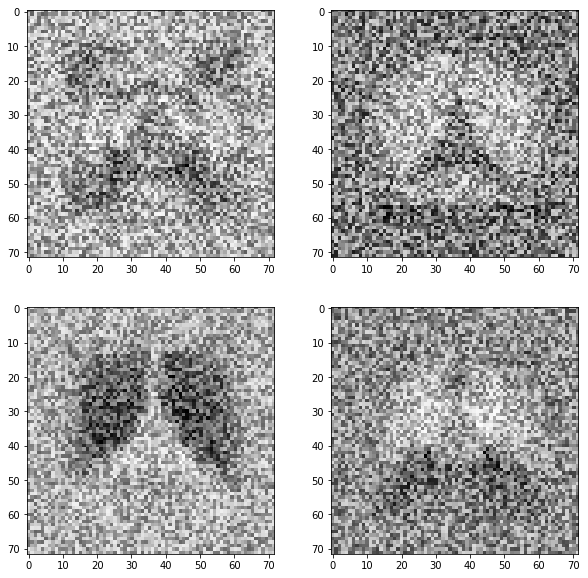

In [45]:
n = 2
fig, ax = plt.subplots(n, n, figsize=(10, 10))

for i in range(n):
    for j in range(n):
        p = np.arange(model.get_weights()[0].shape[1])[n*i + j]
        im = model.get_weights()[0][:, p]
        reshaped_image = im.reshape(72, 72)
        ax[i, j].imshow(reshaped_image, cmap=plt.get_cmap('Greys'))


## A More Difficult Classification Problem

In [46]:
X_train, Y_train = generate_dataset_classification(1000, 20, True)

Creating data:
0
100
200
300
400
500
600
700
800
900


In [47]:
model_conv = Sequential()
model_conv.add(Conv2D(16, 5, activation='relu', input_shape=(72, 72, 1)))
model_conv.add(MaxPool2D())
model_conv.add(Flatten())
model_conv.add(Dense(units=3, activation='tanh'))

model_conv.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(), 
              metrics=[keras.metrics.categorical_accuracy])

model_conv.fit(X_train.reshape(-1, 72, 72, 1), keras.utils.to_categorical(Y_train), epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 5.3873 - categorical_accuracy: 0.3410
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.3996 - categorical_accuracy: 0.3440
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 5.3996 - categorical_accuracy: 0.3440
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.3996 - categorical_accuracy: 0.3440
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.3996 - categorical_accuracy: 0.3440
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.3996 - categorical_accuracy: 0.3440
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.3996 - categorical_accuracy: 0.3440
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 5.3996 - categorical_accuracy: 0.3440
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 5.3996 - cat

In [48]:
X_test, Y_test = generate_test_set_classification()

Creating data:
0
100
200


In [49]:
model_conv.evaluate(X_test.reshape(-1, 72, 72, 1), Y_test)

300/300 [==============================] - 1s 2ms/step


[5.318971487681071, 0.34000000009934106]

The loss on this dataset is lower than on the previous dataset with a linear classifier, but the classification accuracy is also lower. 

We can visualize the convolutional weights learned by the network.

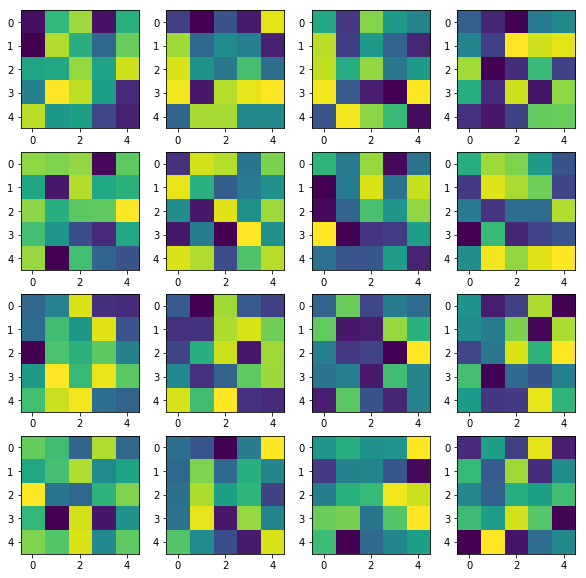

In [50]:
n = 4
fig, ax = plt.subplots(n, n, figsize=(10, 10))
for i in range(n):
    for j in range(n):
        im = model_conv.get_weights()[0][:,:, 0, n*i + j]

        ax[i, j].imshow(im)

## A Regression Problem

In [51]:
[X_train, Y_train] = generate_dataset_regression(900, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890


Data is normalized by ordering the abscisses of the vertices of the triangles. Without doing this, each input has 6 valid answers and would be very unstable during training.

In [52]:
Y_train = Y_train.reshape(-1, 3, 2)
for i in range(Y_train.shape[0]):
    sample = np.array(sorted(Y_train[i, :, :], key=lambda x: x[0]))
    Y_train[i, :, :] = sample
    
Y_train = Y_train.reshape(-1, 6)

In [53]:
model_reg = Sequential()
model_reg.add(Conv2D(32, 5, activation='relu', input_shape=(72, 72, 1)))
model_reg.add(MaxPool2D())
model_reg.add(Conv2D(64, 3, activation='relu'))
model_reg.add(MaxPool2D())
model_reg.add(Conv2D(128, 3, activation='relu'))
model_reg.add(MaxPool2D())
model_reg.add(Conv2D(256, 3, activation='relu'))
model_reg.add(MaxPool2D())
model_reg.add(Flatten())
model_reg.add(Dense(units=200, activation='relu'))
model_reg.add(Dense(units=100, activation='relu'))
model_reg.add(Dense(units=30, activation='relu'))
model_reg.add(Dense(units=30, activation='relu'))
model_reg.add(Dense(units=6, activation='relu'))

model_reg.compile(loss=keras.losses.mse,
                  optimizer=keras.optimizers.adam(), 
                  metrics=[keras.metrics.mean_absolute_error])

model_reg.fit(X_train.reshape(-1, 72, 72, 1), Y_train, epochs=70, batch_size=16)

Epoch 1/70
900/900 [==============================] - 16s 18ms/step - loss: 0.1228 - mean_absolute_error: 0.2657
Epoch 2/70
900/900 [==============================] - 11s 12ms/step - loss: 0.0834 - mean_absolute_error: 0.1978
Epoch 3/70
900/900 [==============================] - 8s 9ms/step - loss: 0.0633 - mean_absolute_error: 0.1661
Epoch 4/70
900/900 [==============================] - 10s 11ms/step - loss: 0.0271 - mean_absolute_error: 0.1220
Epoch 5/70
900/900 [==============================] - 9s 10ms/step - loss: 0.0222 - mean_absolute_error: 0.1096
Epoch 6/70
900/900 [==============================] - 8s 9ms/step - loss: 0.0196 - mean_absolute_error: 0.1029
Epoch 7/70
900/900 [==============================] - 7s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0920
Epoch 8/70
900/900 [==============================] - 7s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0836
Epoch 9/70
900/900 [==============================] - 9s 10ms/step - loss: 0.0116 - mean_absolute_error: 

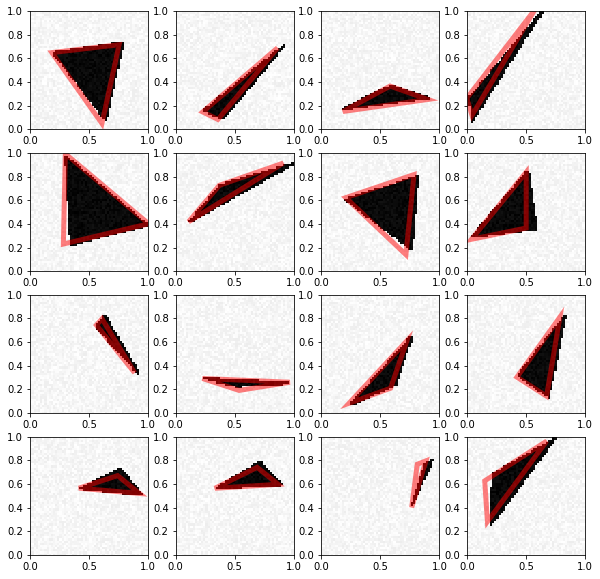

In [54]:
n = 4
fig, ax = plt.subplots(n, n, figsize=(10, 10))
ids = np.random.randint(0, len(X_train), size=(n*n))

for i in range(n):
    for j in range(n):
        visualize_prediction(X_train[ids[n*i + j], :], 
                             model_reg.predict(X_train[ids[n*i + j], :].reshape(-1, 72, 72, 1)),
                             ax[i, j])

The results are very satisfying, we can now take a look at the weights of the first convolutional layer. 

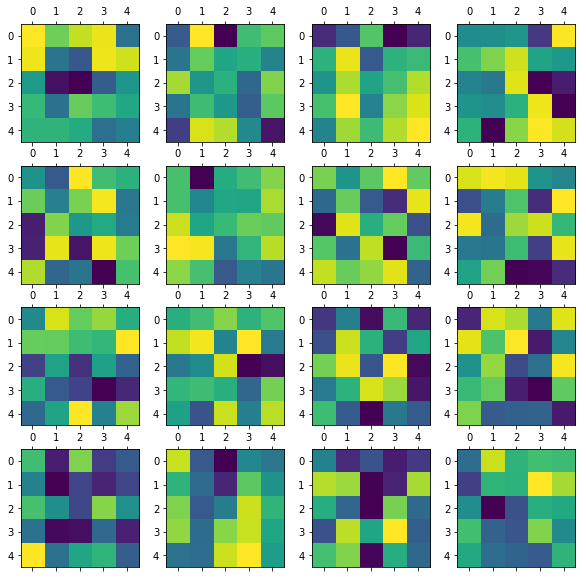

In [55]:
n = 4
fig, ax = plt.subplots(n, n, figsize=(10, 10))
ids = np.random.randint(0, model_reg.get_weights()[0].shape[-1], size=(n*n))
for i in range(n):
    for j in range(n):
        im = model_reg.get_weights()[0][:, :, :, i*n + j].reshape(5, 5)
        ax[i, j].matshow(im)


Let's test the solution on a new dataset not seen by the network.

In [56]:
[X_test, Y_test] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [57]:
Y_test = Y_test.reshape(-1, 3, 2)
for i in range(Y_test.shape[0]):
    sample = np.array(sorted(Y_test[i, :, :], key=lambda x: x[0]))
    Y_test[i, :, :] = sample
    
Y_test = Y_test.reshape(-1, 6)

In [58]:
model_reg.evaluate(X_test.reshape(-1, 72, 72, 1), Y_test)

300/300 [==============================] - 1s 3ms/step


[0.006008377143492301, 0.04956588760018349]

## Bonus Question

Implement a hourglass network for denoising.

We first generate two datasets with the new function `generate_dataset_denoising`.

In [59]:
X_train, Y_train = generate_dataset_denoising(2000, 20, True)

Creating data:
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [60]:
X_test, Y_test = generate_dataset_denoising(200, 20, True)

Creating data:
0
100


We train a network with Max pooling and up sampling layers for denoising.

In [61]:
model_denois = Sequential()
model_denois.add(Conv2D(32, 5, activation='relu', padding="same", input_shape=(72, 72, 1)))
model_denois.add(MaxPool2D())
model_denois.add(Conv2D(64, 3, activation='relu', padding="same"))
model_denois.add(MaxPool2D())
model_denois.add(Conv2D(128, 3, activation='relu', padding="same"))
model_denois.add(MaxPool2D())
model_denois.add(Conv2D(256, 3, activation='relu', padding="same"))
model_denois.add(Conv2D(256, 3, activation='relu', padding="same"))
model_denois.add(UpSampling2D((2, 2)))
model_denois.add(Conv2D(128, 3, activation='relu', padding="same"))
model_denois.add(UpSampling2D((2, 2)))
model_denois.add(Conv2D(64, 3, activation='relu', padding="same"))
model_denois.add(UpSampling2D((2, 2)))
model_denois.add(Conv2D(32, 3, activation='relu', padding="same"))
model_denois.add(Conv2D(1, 3, activation='relu', padding="same"))


model_denois.compile(loss=keras.losses.mse,
                  optimizer=keras.optimizers.adam(), 
                  metrics=[keras.metrics.mean_absolute_error])

model_denois.fit(X_train.reshape(-1, 72, 72, 1), Y_train.reshape(-1, 72, 72, 1), epochs=15, batch_size=16)

Epoch 1/15
2000/2000 [==============================] - 114s 57ms/step - loss: 0.1034 - mean_absolute_error: 0.1643
Epoch 2/15
2000/2000 [==============================] - 104s 52ms/step - loss: 0.0068 - mean_absolute_error: 0.0331
Epoch 3/15
2000/2000 [==============================] - 121s 60ms/step - loss: 0.0044 - mean_absolute_error: 0.0255
Epoch 4/15
2000/2000 [==============================] - 135s 67ms/step - loss: 0.0033 - mean_absolute_error: 0.0217
Epoch 5/15
2000/2000 [==============================] - 120s 60ms/step - loss: 0.0028 - mean_absolute_error: 0.0214
Epoch 6/15
2000/2000 [==============================] - 131s 65ms/step - loss: 0.0024 - mean_absolute_error: 0.0199
Epoch 7/15
2000/2000 [==============================] - 125s 63ms/step - loss: 0.0022 - mean_absolute_error: 0.0198
Epoch 8/15
2000/2000 [==============================] - 136s 68ms/step - loss: 0.0018 - mean_absolute_error: 0.0168
Epoch 9/15
2000/2000 [==============================] - 122s 61ms/step -

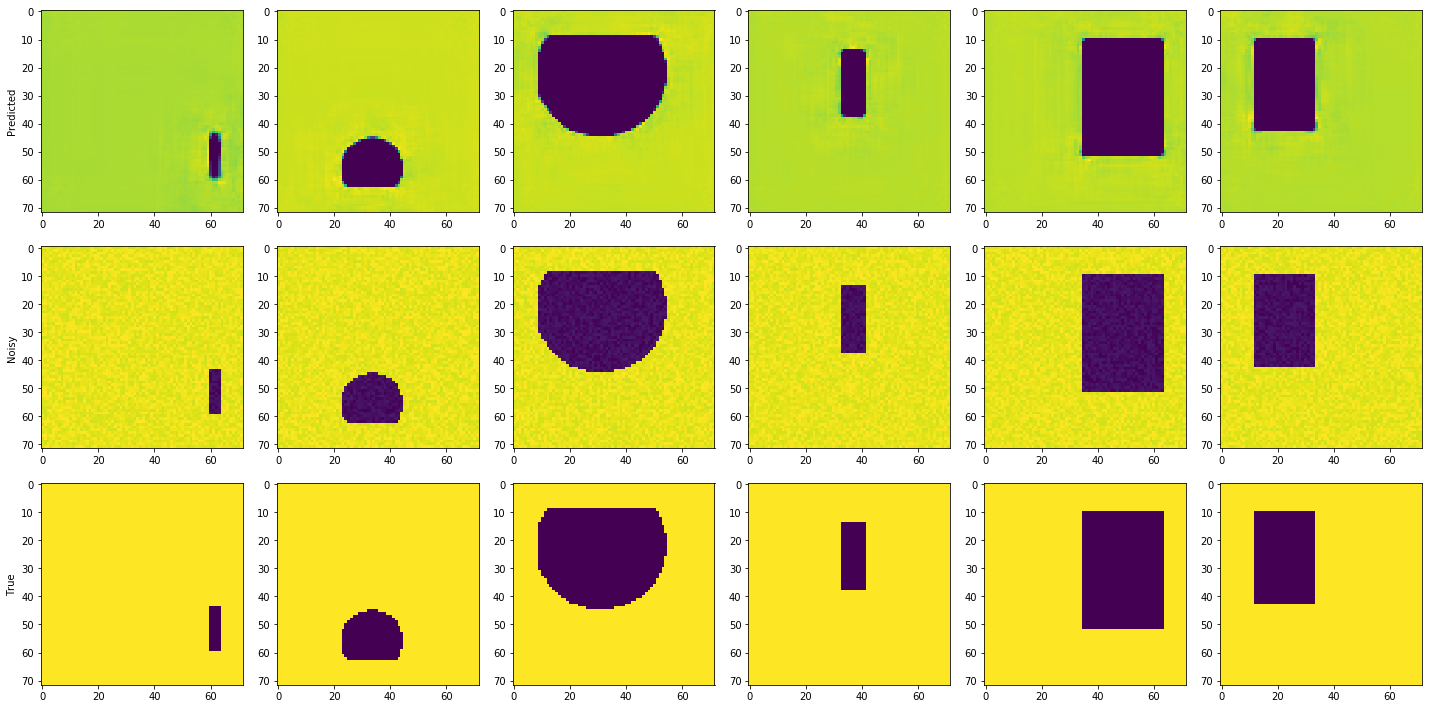

In [72]:
n = 6
idx = np.random.randint(200, size=n)
fig, ax = plt.subplots(3, n, figsize=(20, 10))

ax[0, 0].set_ylabel("Predicted")
ax[1, 0].set_ylabel("Noisy")
ax[2, 0].set_ylabel("True")

for i in range(n):
    Y = model_denois.predict(X_test[idx[i]].reshape(-1, 72, 72, 1))

    ax[0, i].imshow(Y[0, :, :, 0])
    
    ax[1, i].imshow(X_test[idx[i]].reshape(72, 72))
    
    ax[2, i].imshow(Y_test[idx[i]].reshape(72, 72))

fig.tight_layout()

The denoiser is good at keeping the output shape close to the input shape. It introduces some artifacts during denoising but has satisfying results overall.